In [1]:
# LIBRARIES

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [2]:
df = pd.read_excel("DryBeanDataset/Dry_Bean_Dataset.xlsx")

In [3]:
df.groupby('Class').mean()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
BARBUNYA,69804.133132,1046.105764,370.044279,240.309352,1.544395,0.754665,71025.729198,297.311018,0.749273,0.982804,0.800200,0.805001,0.005357,0.001394,0.649144,0.995739
BOMBAY,173485.059387,1585.619079,593.152075,374.352547,1.585550,0.770518,175813.116858,468.941426,0.776559,0.986902,0.864421,0.792622,0.003442,0.000844,0.629195,0.991841
CALI,75538.211043,1057.634282,409.499538,236.370616,1.733663,0.814804,76688.503067,309.535280,0.758953,0.985021,0.845934,0.756703,0.005459,0.001107,0.573022,0.990584
DERMASON,32118.710942,665.209536,246.557279,165.657143,1.490471,0.736632,32498.435138,201.683813,0.752953,0.988226,0.908114,0.819110,0.007755,0.002161,0.671636,0.996914
HOROZ,53648.508817,919.859676,372.570290,184.170663,2.026119,0.867443,54440.091805,260.730715,0.706393,0.985480,0.794420,0.700880,0.007007,0.001048,0.491791,0.991926
SEKER,39881.299951,727.672440,251.291957,201.909653,1.245182,0.584781,40269.567341,224.948441,0.771674,0.990351,0.944508,0.896841,0.006334,0.002541,0.805149,0.998383
SIRA,44729.128604,796.418737,299.380258,190.800250,1.570083,0.767277,45273.099772,238.335316,0.749445,0.987971,0.884652,0.797345,0.006720,0.001683,0.636358,0.995385


## PCA
 - Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. 
The input data is centered but not scaled for each feature before applying the SVD.

 - After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

 - PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms. If you don’t scale your data, it can have a negative effect on your algorithm.

 - **Explained variance**: The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important because while you can convert sixteen-dimensional space to a two-dimensional space, you lose some of the variance (information) when you do this.
By using the attribute **explained_variance_ratio_**, you can see that the first principal component contains 55.46% of the variance, and the second principal component contains 26.43% of the variance. Together, the two components contain 81.89% of the information.

In [18]:
def my_pca(df, bombay_dropped=False, n_components = 16):

    if bombay_dropped:
        df = df[(df["Class"] != 'BOMBAY')]


    X = df[df.columns.tolist()[:-1]]
    y = df["Class"]

    # Standardizing the features
    X = StandardScaler().fit_transform(X)

    pca = PCA(n_components=n_components)

    principalComponents = pca.fit_transform(X)

    columns = []
    for i in range(1, n_components+1):
        columns.append('PC'+str(i))    
    
    pca_df = pd.DataFrame(data = principalComponents, columns=columns)

    pca_df = pd.concat([pca_df, df[['Class']]], axis = 1)

    print("\n".join("Variance of PC{}: {:0.6f}%".format(x, y) for x, y in zip(range(1,17), pca.explained_variance_ratio_*100)))
    print('\n')
    print("\n".join("Cumulative variance keeping at most {} PCA components: {:0.6f}%".format(x, y) for x, y in zip(range(1,17), np.cumsum(pca.explained_variance_ratio_*100))))

    return pca_df

## Correlation before and after PCA

Variance of PC1: 55.466439%
Variance of PC2: 26.430973%
Variance of PC3: 8.006564%
Variance of PC4: 5.114080%
Variance of PC5: 2.739293%
Variance of PC6: 1.149761%
Variance of PC7: 0.697651%
Variance of PC8: 0.325082%
Variance of PC9: 0.051627%
Variance of PC10: 0.009087%
Variance of PC11: 0.006589%
Variance of PC12: 0.001837%
Variance of PC13: 0.000930%
Variance of PC14: 0.000063%
Variance of PC15: 0.000013%
Variance of PC16: 0.000011%


Cumulative variance keeping at most 1 PCA components: 55.466439%
Cumulative variance keeping at most 2 PCA components: 81.897412%
Cumulative variance keeping at most 3 PCA components: 89.903976%
Cumulative variance keeping at most 4 PCA components: 95.018056%
Cumulative variance keeping at most 5 PCA components: 97.757349%
Cumulative variance keeping at most 6 PCA components: 98.907110%
Cumulative variance keeping at most 7 PCA components: 99.604761%
Cumulative variance keeping at most 8 PCA components: 99.929843%
Cumulative variance keeping at most 9

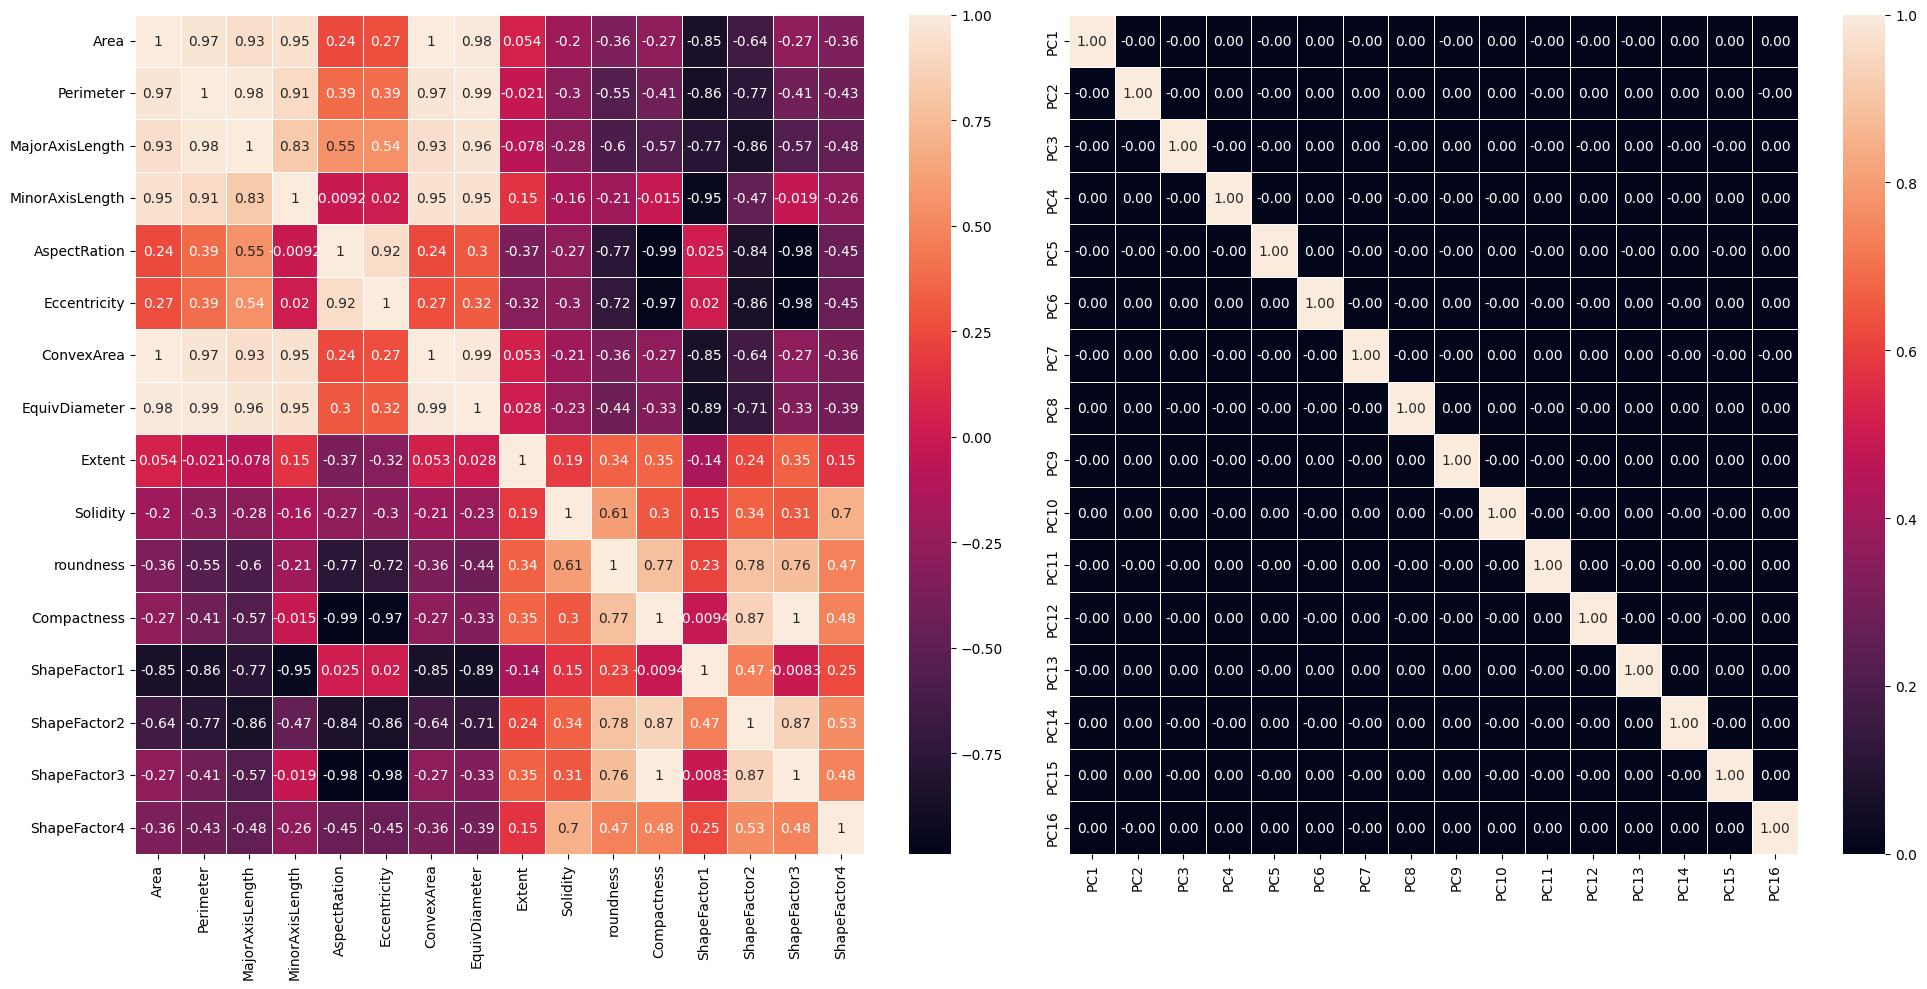

In [19]:
pca_df = my_pca(df, bombay_dropped=False, n_components=16)

fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax[0]);
sns.heatmap(pca_df.corr(numeric_only=True,), annot=True, linewidths=.5, ax=ax[1], fmt='.2f');
fig.tight_layout()


## 2 components PCA (data visualization)

We keep the first 2 PCA components for the sake of data visualization.

Variance of PC1: 55.466439%
Variance of PC2: 26.430973%


Cumulative variance keeping at most 1 PCA components: 55.466439%
Cumulative variance keeping at most 2 PCA components: 81.897412%


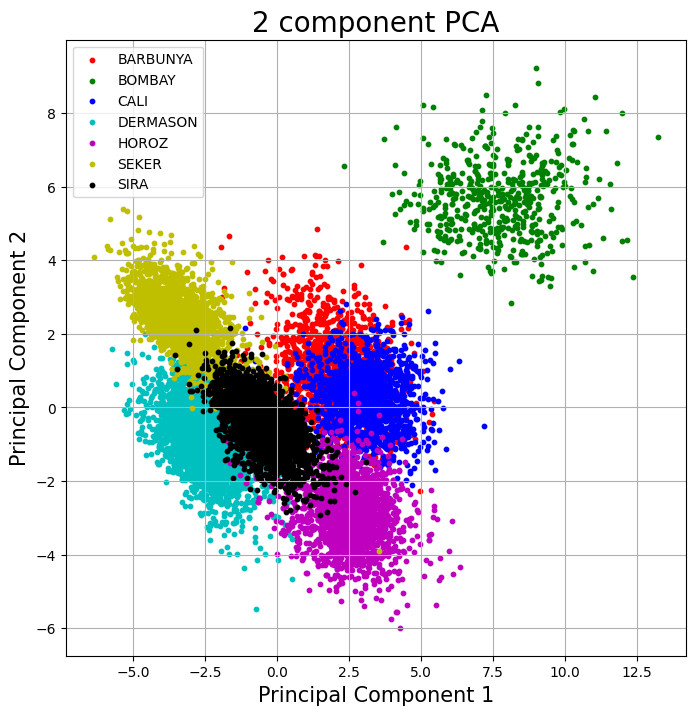

In [21]:
bombay_dropped = False
pca_df = my_pca(df, bombay_dropped, n_components=2)

# DATA VISUALIZATION in 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

if bombay_dropped:
    labels = ['BARBUNYA', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'b', 'c', 'm', 'y', 'k']
else:
    labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for label, color in zip(labels,colors):
    indicesToKeep = pca_df['Class'] == label
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
            , pca_df.loc[indicesToKeep, 'PC2']
            , c = color
            , s = 10)

ax.legend(labels)
ax.grid()

Variance of PC1: 59.788707%
Variance of PC2: 23.060480%


Cumulative variance keeping at most 1 PCA components: 59.788707%
Cumulative variance keeping at most 2 PCA components: 82.849186%


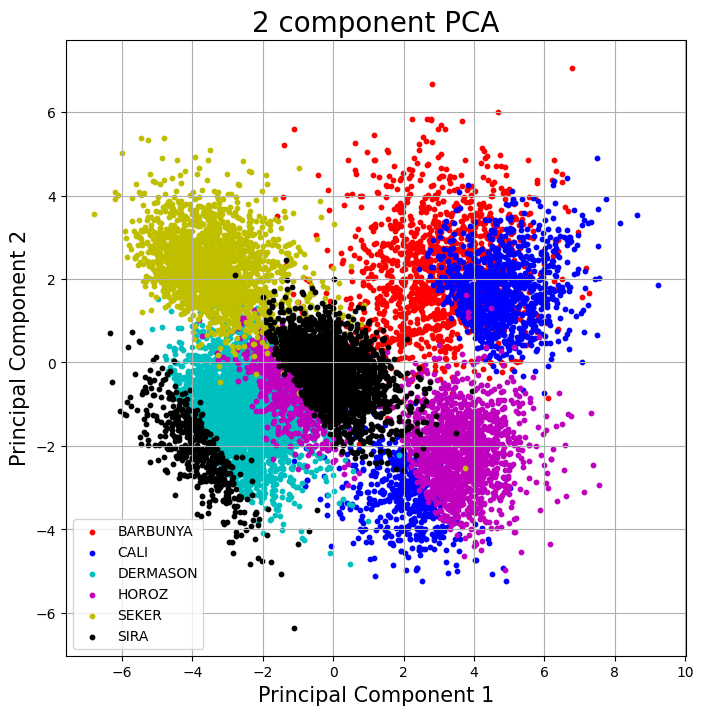

In [23]:
# 2D PCA without the BOMBAY class
bombay_dropped = True
pca_df = my_pca(df, bombay_dropped, n_components=2)

# DATA VISUALIZATION in 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

if bombay_dropped:
    labels = ['BARBUNYA', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'b', 'c', 'm', 'y', 'k']
else:
    labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for label, color in zip(labels,colors):
    indicesToKeep = pca_df['Class'] == label
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
            , pca_df.loc[indicesToKeep, 'PC2']
            , c = color
            , s = 10)

ax.legend(labels)
ax.grid()

## 3 components PCA (data visualization)

We keep the first 3 components for the sake of data visualization.

In [23]:
%matplotlib widget

Variance of PC1: 59.788707%
Variance of PC2: 23.060480%
Variance of PC3: 7.813284%


Cumulative variance keeping at most 1 PCA components: 59.788707%
Cumulative variance keeping at most 2 PCA components: 82.849186%
Cumulative variance keeping at most 3 PCA components: 90.662470%


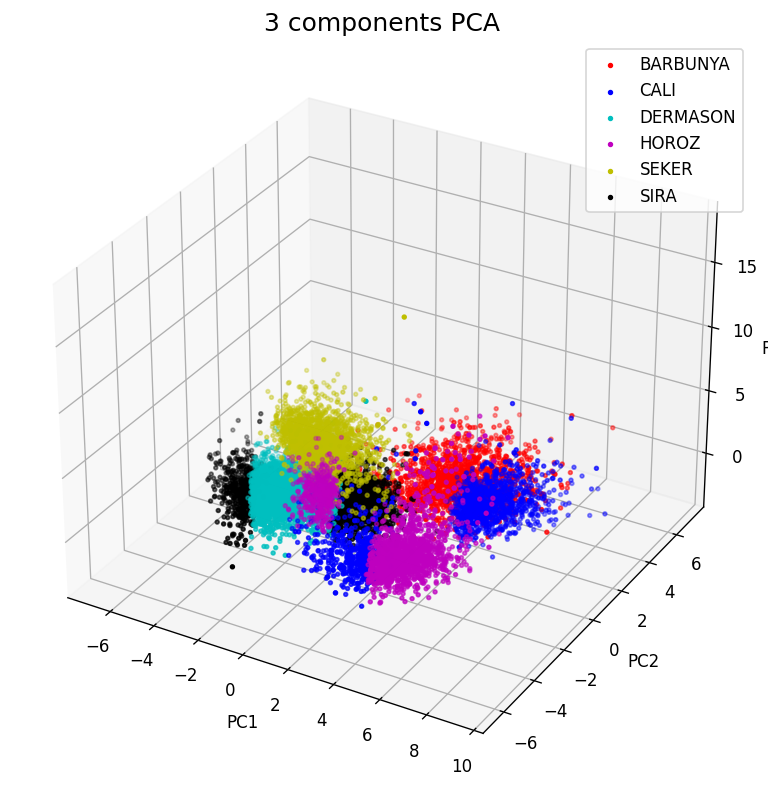

In [24]:
# 3D PCA
bombay_dropped = True
pca_df = my_pca(df, n_components=3, bombay_dropped=True)

# DATA VISUALIZATION in 3D
fig = plt.figure(dpi=120, figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') 
ax.set_xlabel('PC1', fontsize = 10)
ax.set_ylabel('PC2', fontsize = 10)
ax.set_zlabel('PC3', fontsize = 10)
# ax.set_tick(fontsize=5)
ax.set_title('3 components PCA', fontsize = 15)

if bombay_dropped:
    labels = ['BARBUNYA', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'b', 'c', 'm', 'y', 'k']
else:
    labels = ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for label, color in zip(labels,colors):
    indicesToKeep = pca_df['Class'] == label
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
            , pca_df.loc[indicesToKeep, 'PC2']
            , pca_df.loc[indicesToKeep, 'PC3']
            , c = color
            , s = 5)

ax.legend(labels, fontsize = 10, loc=0)
ax.grid()
